In [1]:
import pickle #read pickle file
import coffea
from coffea import hist
import topcoffea.modules.HistEFT as HistEFT
import topcoffea.modules.eft_helper as efth
import gzip #read zipped pickle file
import matplotlib.pyplot as plt #plot histograms
from matplotlib.backends.backend_pdf import PdfPages
import topcoffea.modules.utils as utils
import mplhep as hep
import numpy as np

/afs/crc.nd.edu/user/h/hnelson2/miniconda3/envs/ttbarEFT-env/lib/python3.9/site-packages/coffea/util.py:154: FutureWarning: In coffea version v2023.3.0 (target date: 31 Mar 2023), this will be an error.
(Set coffea.deprecations_as_errors = True to get a stack trace now.)
ImportError: coffea.hist is deprecated
  warnings.warn(message, FutureWarning)


In [2]:
hep.style.use("CMS")
params = {'axes.labelsize': 20,
          'axes.titlesize': 20,
          'legend.fontsize':20}
plt.rcParams.update(params)

In [3]:
#Example usage with HistEFT: h.set_wilson_coefficients(**orig_pts)
orig_pts = {"ctGIm": 1.0, "ctGRe":0.7, "cQj38": 9.0, "cQj18": 7.0,
            "cQu8": 9.5, "cQd8": 12.0, "ctj8": 7.0, "ctu8": 9.0,
            "ctd8": 12.4, "cQj31": 3.0, "cQj11": 4.2, "cQu1": 5.5,
            "cQd1": 7.0, "ctj1": 4.4, "ctu1": 5.4, "ctd1": 7.0}

### Get Value of sow to get normalization for each sample

In [24]:
fin = "njets_nocuts_norm.pkl.gz"

In [25]:
hists = utils.get_hist_from_pkl(fin, allow_empty=False)
print(hists)

{'sow': <HistEFT (sample,sow) instance at 0x7fe679ac4ca0>, 'nevents': <HistEFT (sample,nevents) instance at 0x7fe679a38610>, 'njets': <HistEFT (sample,njets) instance at 0x7fe67b5a08e0>}


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
{('TT01j2l_S4',): array([0.00000000e+00, 0.00000000e+00, 2.21492346e-06, 7.32051332e-05,
       2.59214640e-03, 2.24591152e-02, 1.16883913e-01, 1.78397565e-01,
       1.98113545e-01, 1.76904268e-01]), ('TT01j2l_S5',): array([0.00000000e+00, 0.00000000e+00, 1.14197636e-06, 1.15551474e-05,
       1.53959031e-03, 2.30762294e-02, 1.17464914e-01, 1.81233136e-01,
       2.01430835e-01, 1.74079742e-01]), ('TT01j2l_S1',): array([0.00000000e+00, 0.00000000e+00, 1.60666582e-06, 1.13595876e-05,
       1.68720262e-03, 2.32748317e-02, 1.18343664e-01, 1.80924965e-01,
       1.94491400e-01, 1.70668992e-01]), ('TT01j2l_S2',): array([0.00000000e+00, 0.00000000e+00, 2.08599780e-06, 1.43942420e-05,
       2.24465212e-03, 2.49243860e-02, 1.18321947e-01, 1.77476500e-01,
       1.93111495e-01, 1.82011361e-01]), ('TT01j2l_S3',): array([0.00000000e+00, 0.00000000e+00, 5.27740330e-07, 8.35737787e-06,
       1.82593377e-03, 2.33019611e-02, 1.17039764e-01, 1.7495

<Axes: xlabel='njets', ylabel='Events'>

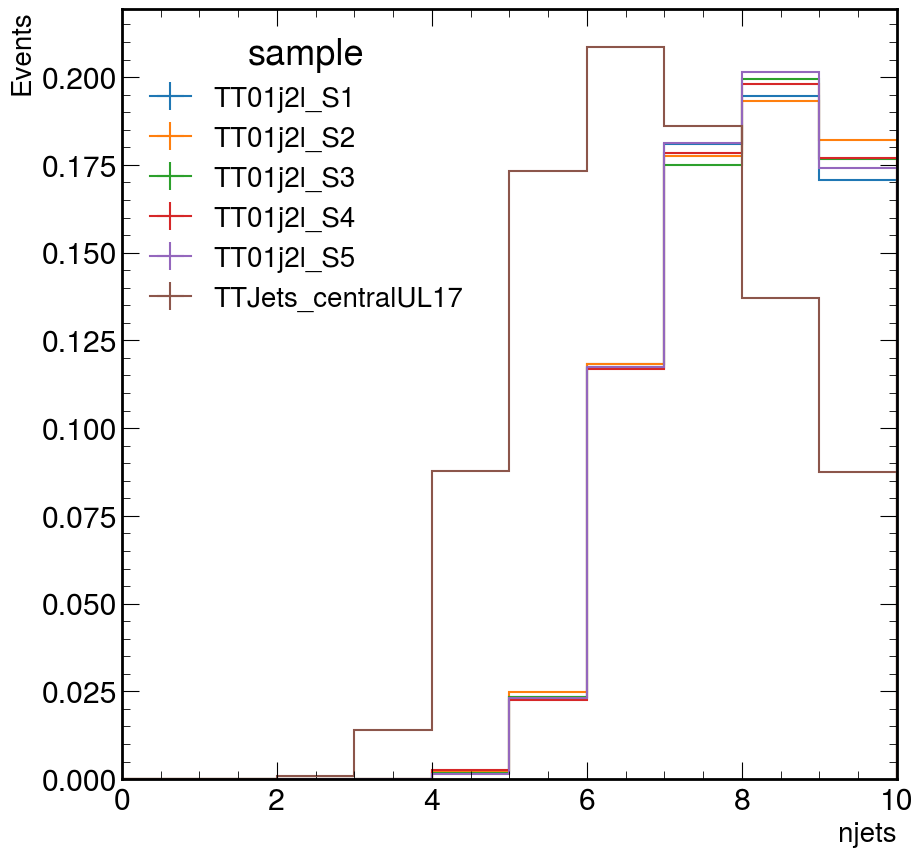

In [26]:
# Getting values for sow for normalization of samples
# ax.set_prop_cycle(color = ['blue', 'orange', 'green', 'red', 'purple', 'black'])

h = hists['njets']
h.set_sm()
#h.set_wilson_coefficients(**orig_pts)
print(h._wcs)
print(h.values())
fig, ax = plt.subplots(1,1)
hist.plot1d(h, ax=ax, stack=False)

# h = hists['nevents']
# h.set_sm()
# print(h._wcs)
# print(h.values())

### Make plots of all TT01j2l samples compared to central, correct normalization

In [14]:
fin = 'all_signal.pkl.gz'

In [15]:
hists = utils.get_hist_from_pkl(fin, allow_empty=False)
print(hists)

{'tops_pt': <HistEFT (sample,tops_pt) instance at 0x7fe6945d3c40>, 'ht': <HistEFT (sample,ht) instance at 0x7fe684375cd0>, 'jets_pt': <HistEFT (sample,jets_pt) instance at 0x7fe68417fb20>, 'j0pt': <HistEFT (sample,j0pt) instance at 0x7fe6798caf70>, 'ntops': <HistEFT (sample,ntops) instance at 0x7fe6798cf340>, 'njets': <HistEFT (sample,njets) instance at 0x7fe6798cf640>, 'mtt': <HistEFT (sample,mtt) instance at 0x7fe6798cf940>, 'nleps': <HistEFT (sample,nleps) instance at 0x7fe6798cfc40>, 'mll': <HistEFT (sample,mll) instance at 0x7fe6798cff40>}


In [19]:
def plot_hist_sm(hists, name):
    h = hists[name]
    h.set_sm()
    # print(name, h.values())
    fig, ax = plt.subplots(1,1) #create an axis for plotting
    hist.plot1d(h, ax=ax, stack=False)
    ax.legend()
    fig.suptitle("Reweighted to SM")
    plt.show()

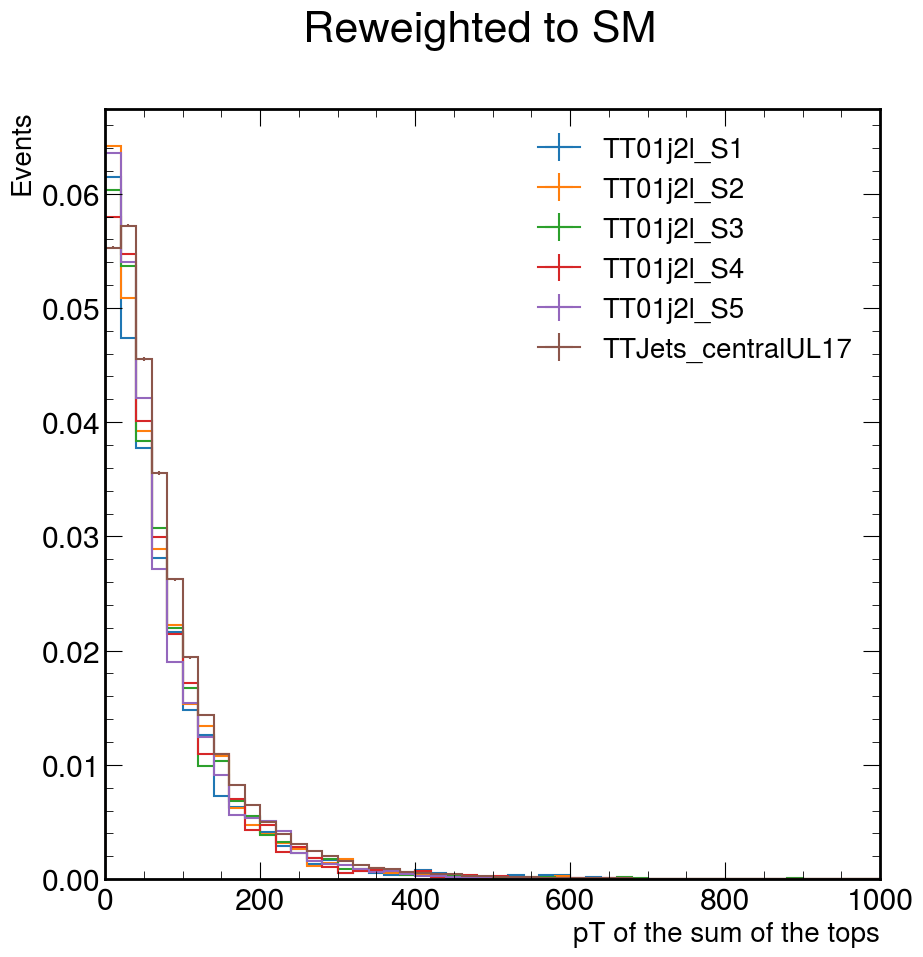

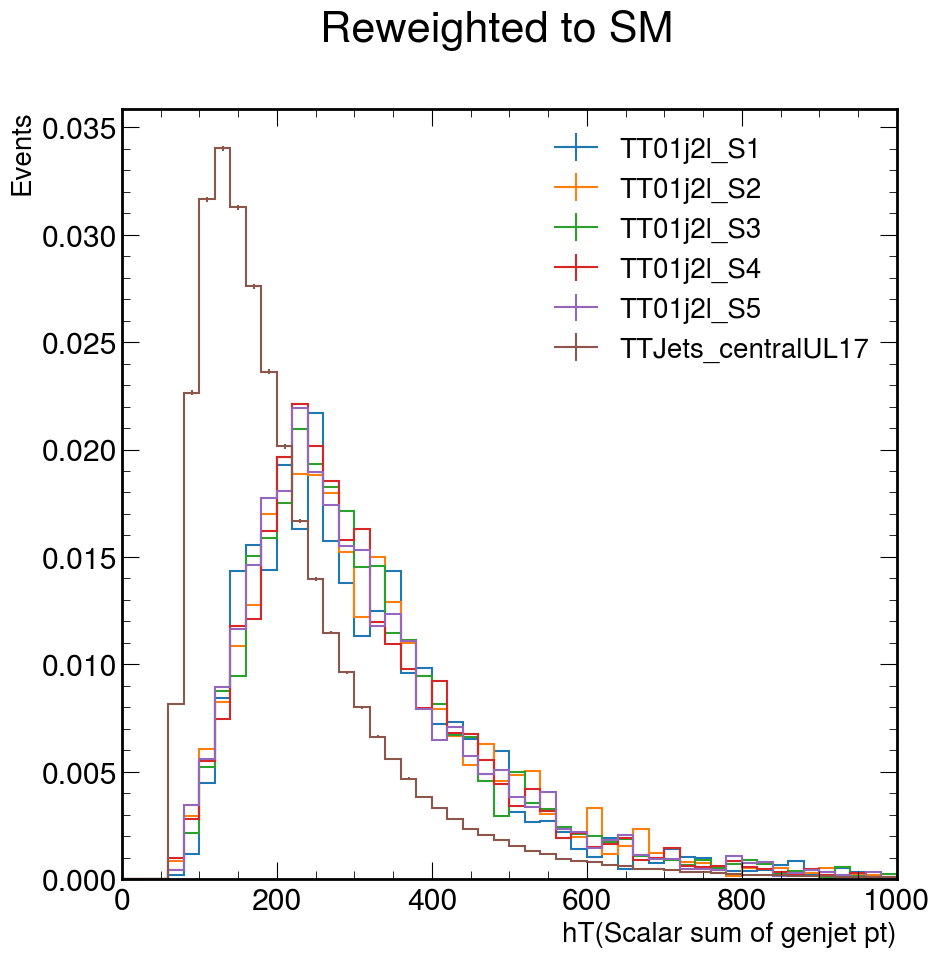

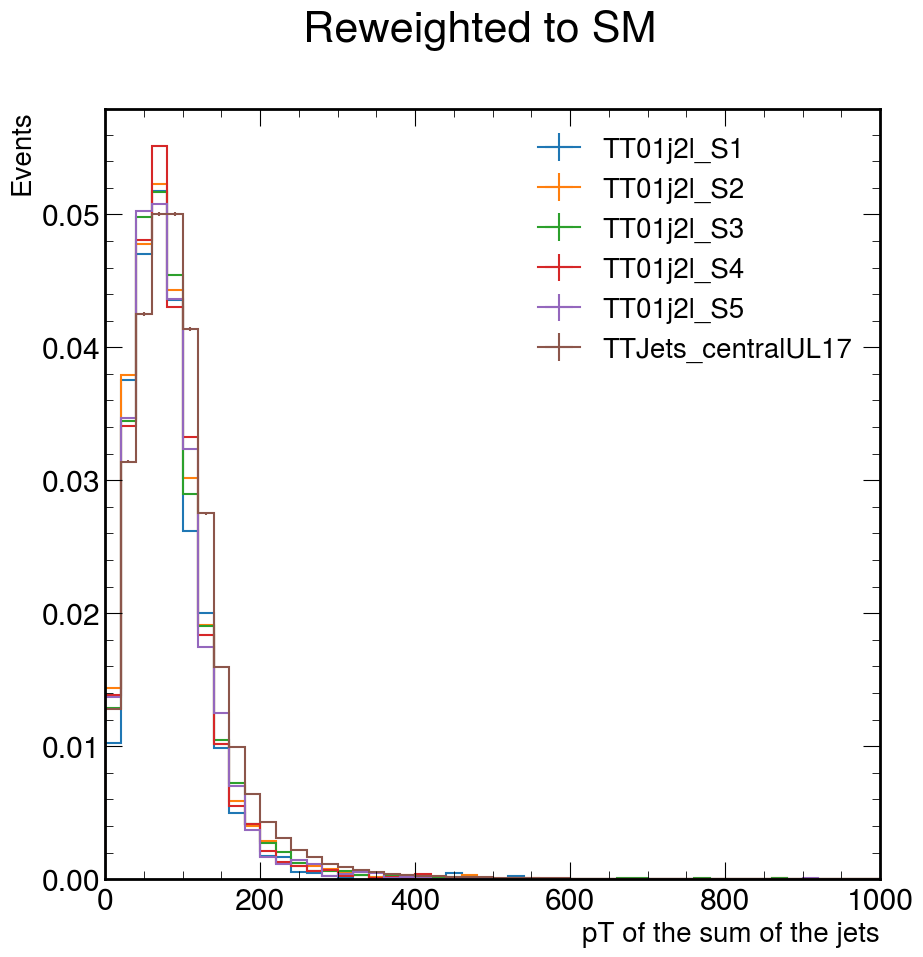

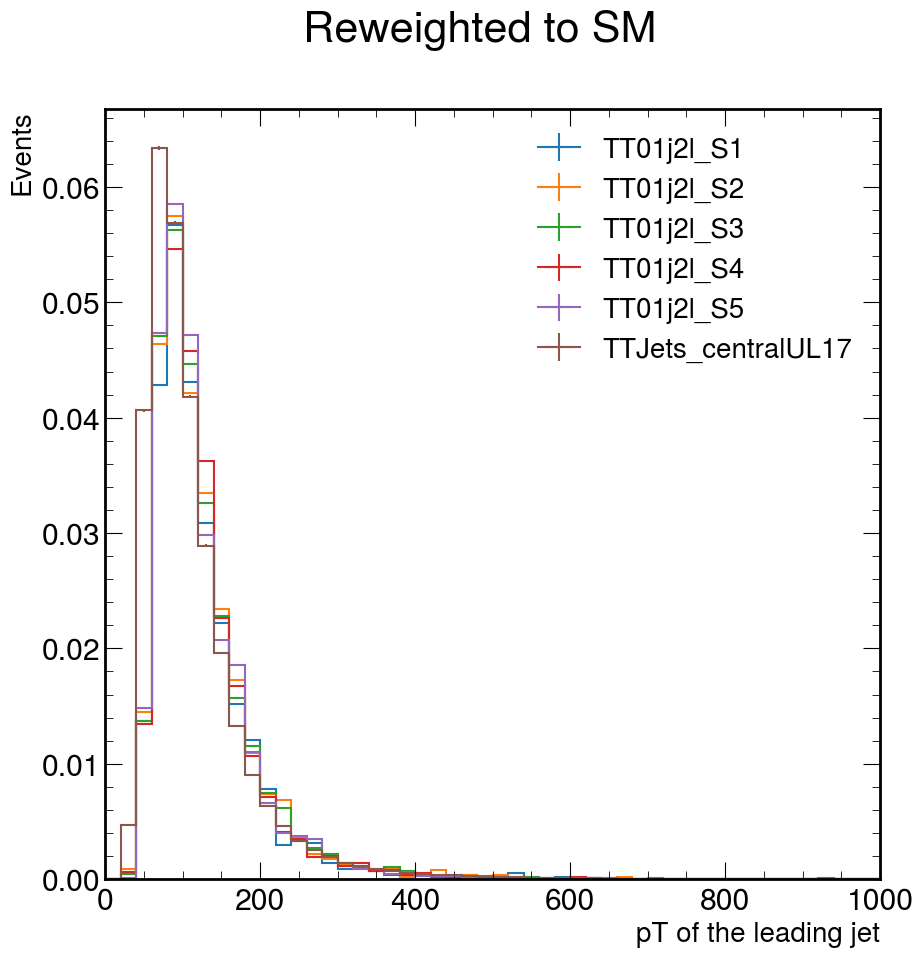

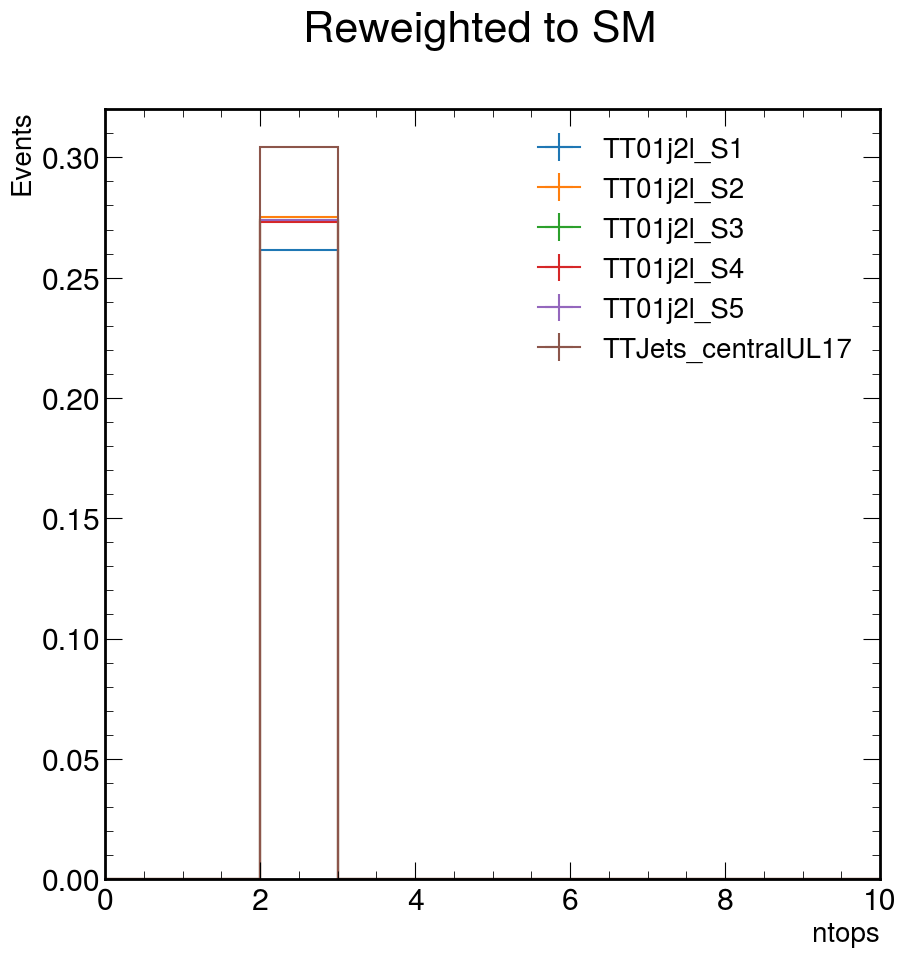

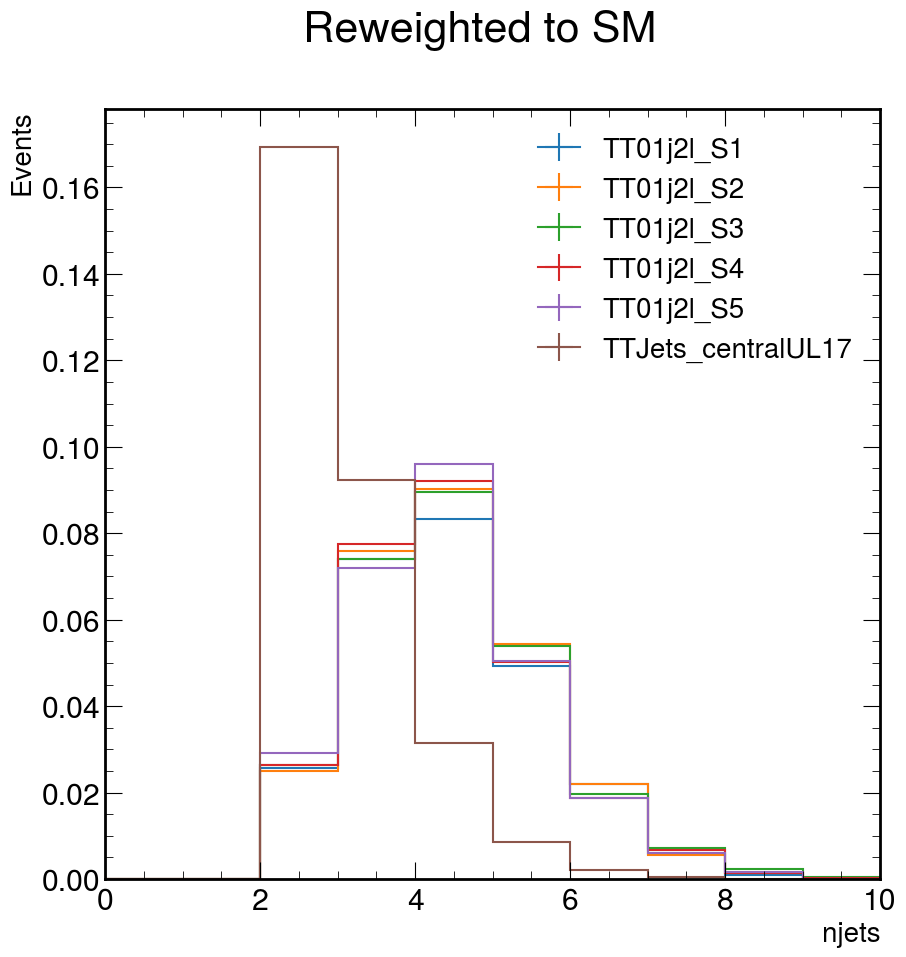

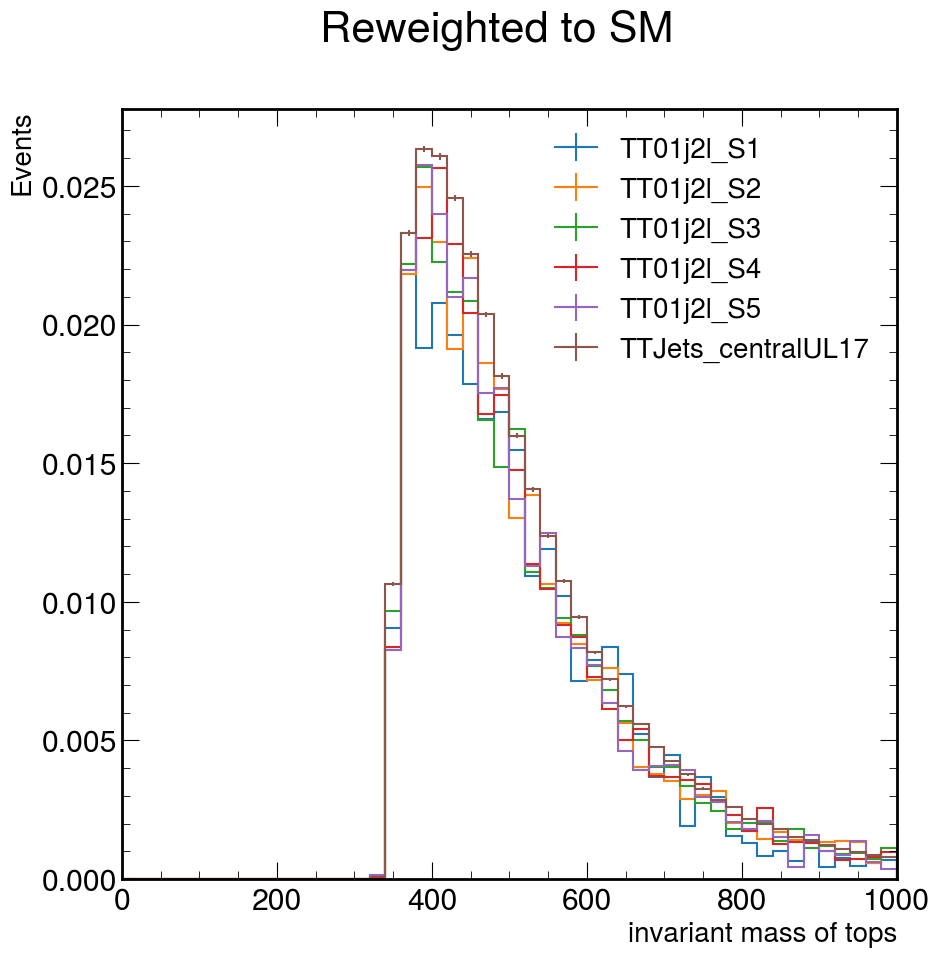

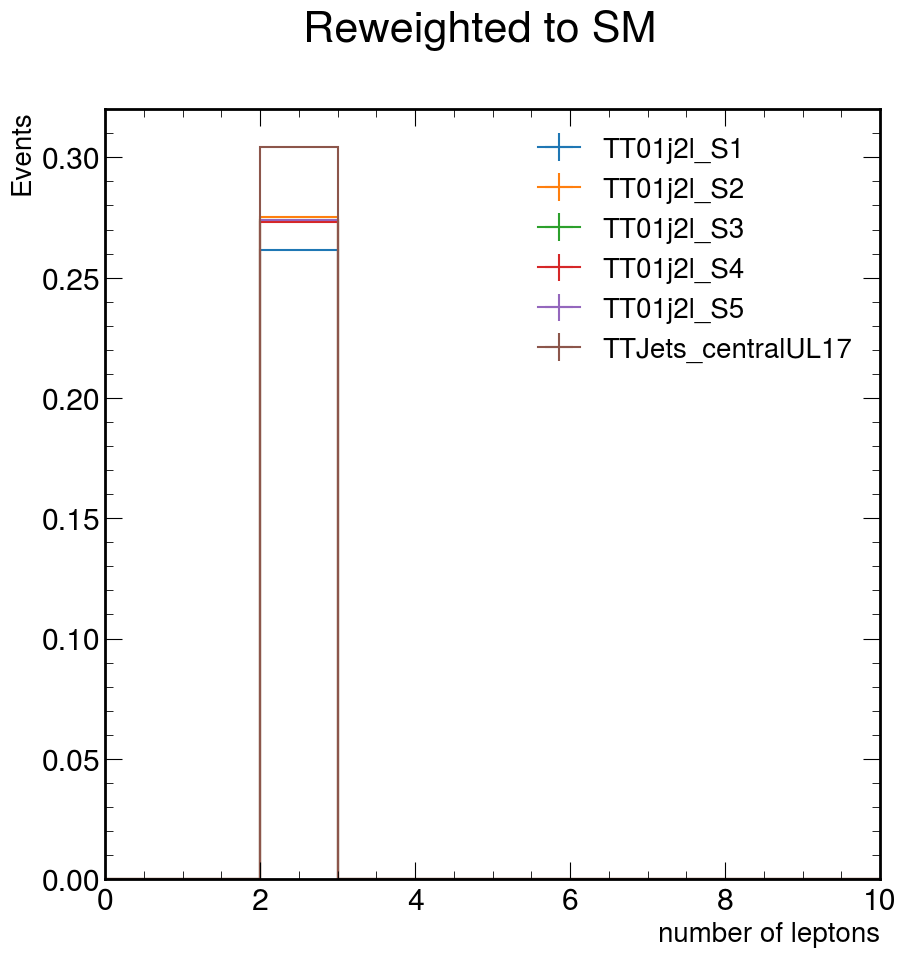

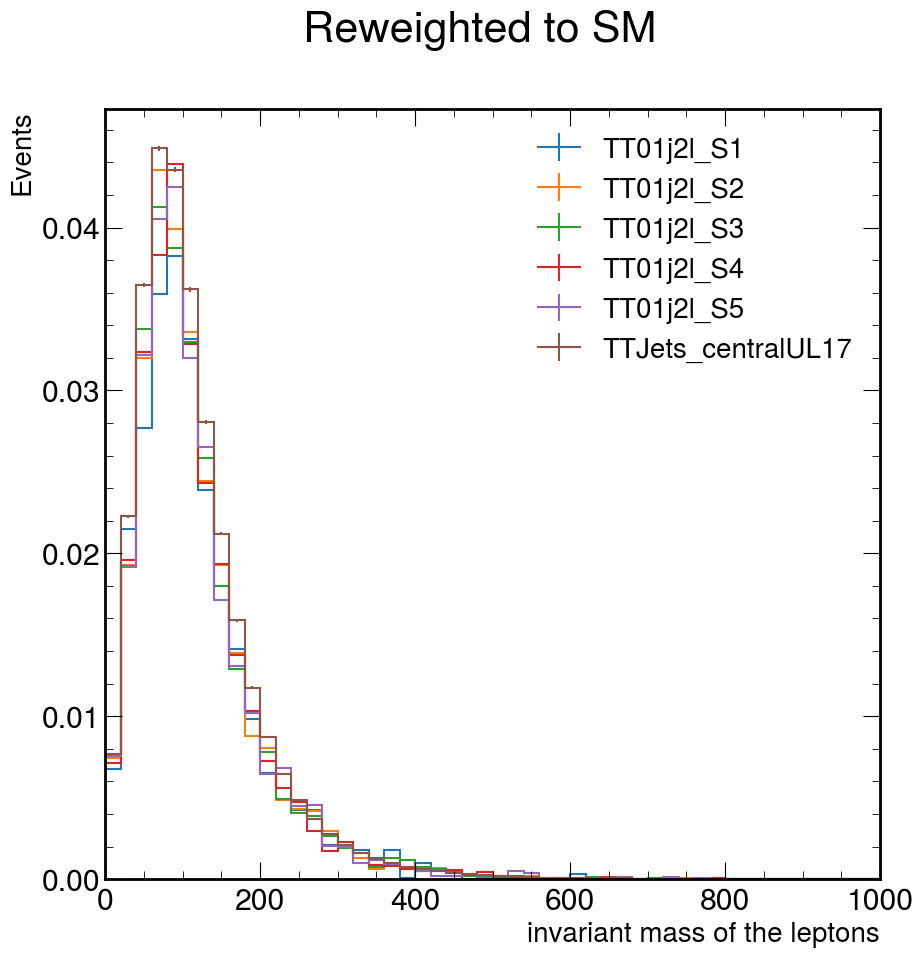

In [20]:
for name in hists:
    plot_hist_sm(hists, name)